<a href="https://colab.research.google.com/github/GhujarvadiSravanthi/ShadowFox/blob/main/AirQualityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Check column names from uploaded file
for fn in uploaded.keys():
    print("Uploaded file:", fn)
    df = pd.read_csv(fn)
    print("\n📋 Column names in your CSV:")
    print(df.columns)
    df.head()


Saving delhiaqi (1).csv to delhiaqi (1) (2).csv
Uploaded file: delhiaqi (1) (2).csv

📋 Column names in your CSV:
Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


In [5]:
print(df.columns)
df.head()


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [7]:
print(df.columns)
print(df.dtypes)


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')
date      object
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [9]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day


In [10]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Month'].apply(get_season)


In [11]:
# AQI proxy based on major pollutants (simplified logic)
df['AQI_approx'] = df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']].max(axis=1)


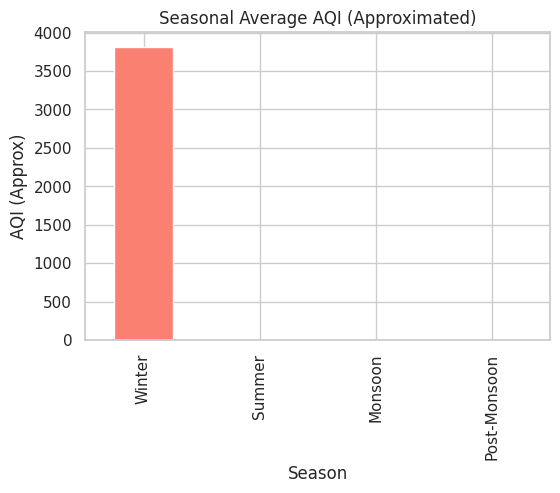

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

season_avg = df.groupby('Season')['AQI_approx'].mean().reindex(['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'])

plt.figure(figsize=(6, 4))
season_avg.plot(kind='bar', color='salmon')
plt.title("Seasonal Average AQI (Approximated)")
plt.ylabel("AQI (Approx)")
plt.show()


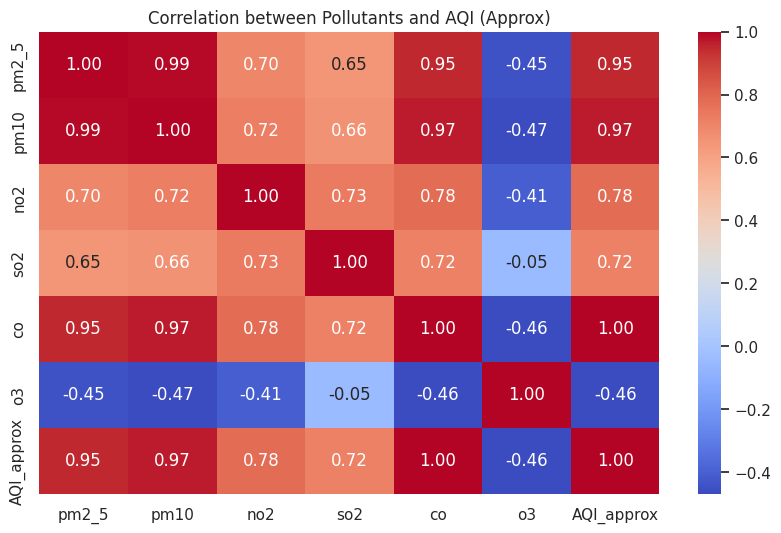

In [13]:
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'AQI_approx']

plt.figure(figsize=(10, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Pollutants and AQI (Approx)")
plt.show()


In [14]:
df.to_csv("delhi_aqi_cleaned.csv", index=False)


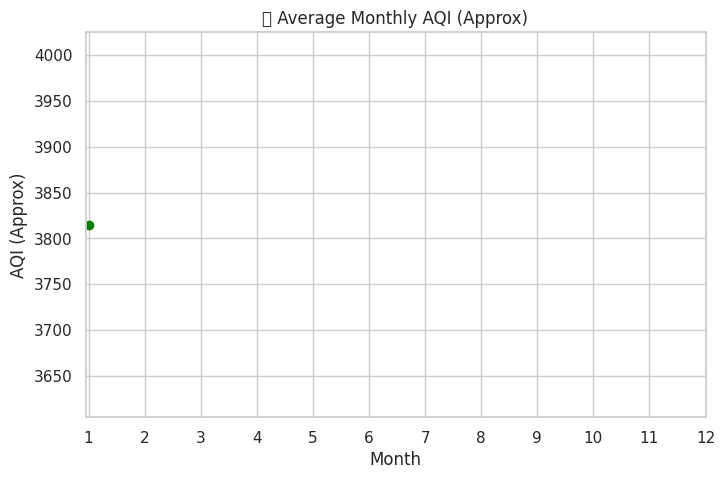

In [16]:
monthly_avg = df.groupby('Month')['AQI_approx'].mean()

plt.figure(figsize=(8, 5))
monthly_avg.plot(marker='o', color='green')
plt.title("📈 Average Monthly AQI (Approx)")
plt.xlabel("Month")
plt.ylabel("AQI (Approx)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


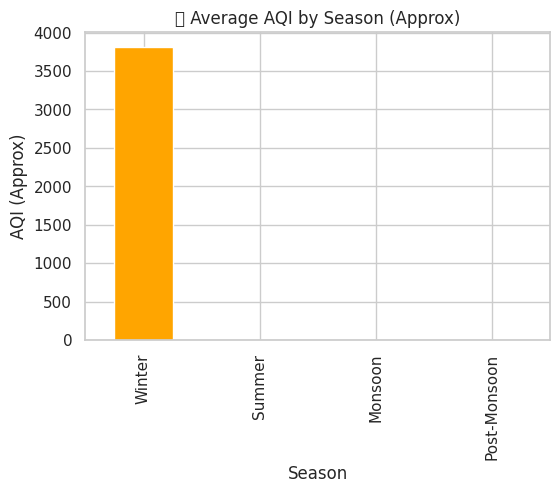

In [17]:
season_avg = df.groupby('Season')['AQI_approx'].mean().reindex(['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'])

plt.figure(figsize=(6, 4))
season_avg.plot(kind='bar', color='orange')
plt.title("📊 Average AQI by Season (Approx)")
plt.ylabel("AQI (Approx)")
plt.show()


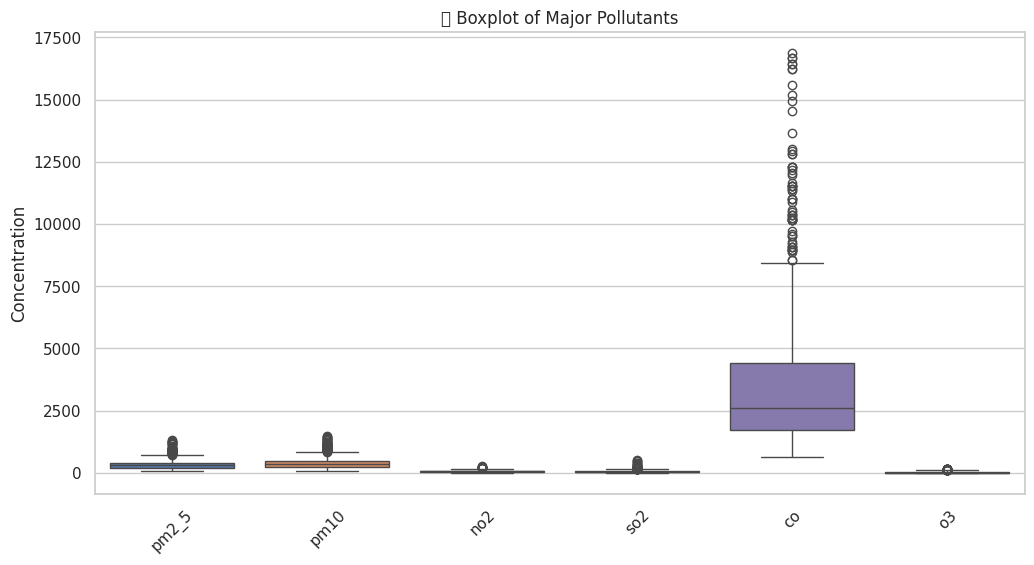

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']])
plt.title("📦 Boxplot of Major Pollutants")
plt.ylabel("Concentration")
plt.xticks(rotation=45)
plt.show()


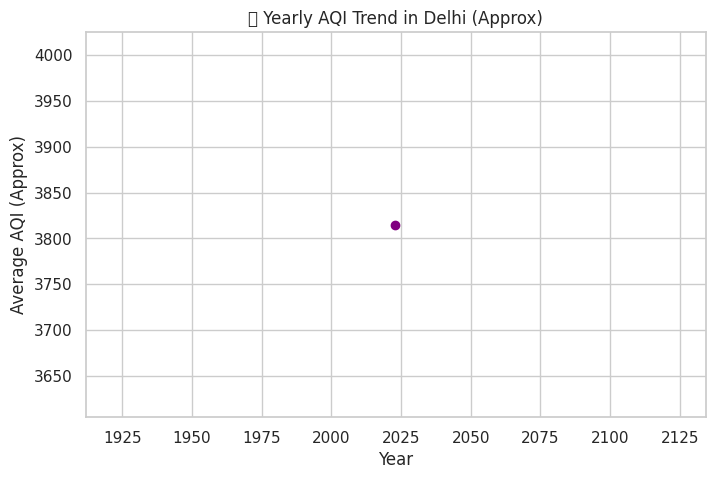

In [19]:
yearly_avg = df.groupby('Year')['AQI_approx'].mean()

plt.figure(figsize=(8, 5))
yearly_avg.plot(marker='o', linestyle='--', color='purple')
plt.title("📅 Yearly AQI Trend in Delhi (Approx)")
plt.xlabel("Year")
plt.ylabel("Average AQI (Approx)")
plt.grid(True)
plt.show()


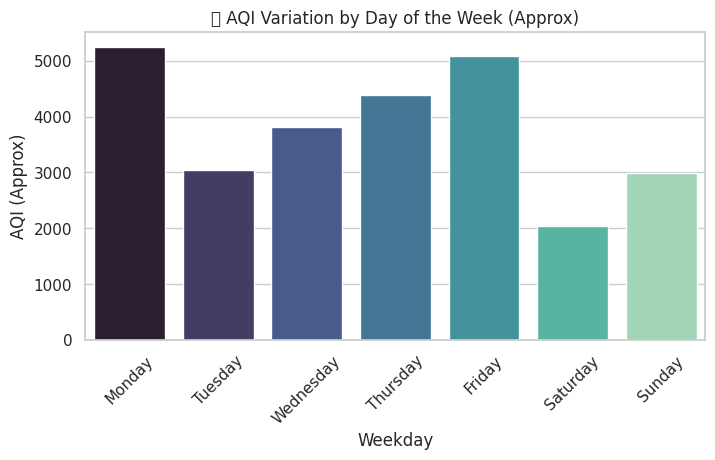

In [20]:
df['Weekday'] = df['date'].dt.day_name()

weekday_avg = df.groupby('Weekday')['AQI_approx'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 4))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='mako')
plt.title("📆 AQI Variation by Day of the Week (Approx)")
plt.ylabel("AQI (Approx)")
plt.xticks(rotation=45)
plt.show()


In [21]:
df.to_csv("delhi_aqi_cleaned.csv", index=False)
